In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline
import datetime

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        # Months ---> June + May + April
       # 13 Weeks
week_nums = [210626, 210619, 210612,210605,210529,210522,210515,210508,210501,210424,210417,210410,210403]
turnstiles_df = get_data(week_nums)

# DATA CLEAN

In [3]:
turnstiles_df.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

In [4]:
turnstiles_df.describe()

,ENTRIES,EXITS
count,2.720549e+06,2.720549e+06
mean,4.186309e+07,3.364190e+07
std,2.185441e+08,1.932820e+08
min,0.000000e+00,0.000000e+00
25%,2.169840e+05,9.345200e+04
50%,1.434403e+06,8.618910e+05
75%,6.064212e+06,3.999029e+06
max,2.147432e+09,2.122977e+09


In [5]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2720549 entries, 0 to 209067
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   DATE_TIME  datetime64[ns]
 1   C/A        object        
 2   UNIT       object        
 3   SCP        object        
 4   STATION    object        
 5   LINENAME   object        
 6   DIVISION   object        
 7   DATE       object        
 8   TIME       object        
 9   DESC       object        
 10  ENTRIES    int64         
 11  EXITS      int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 269.8+ MB


In [6]:
turnstiles_df.dtypes

DATE_TIME    datetime64[ns]
C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE                 object
TIME                 object
DESC                 object
ENTRIES               int64
EXITS                 int64
dtype: object

# DATA NULL

In [7]:
turnstiles_df.isna().sum()

DATE_TIME    0
C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
dtype: int64

In [8]:
turnstiles_df.DATE.value_counts().sort_index()

03/27/2021    29846
03/28/2021    29822
03/29/2021    29880
03/30/2021    29990
03/31/2021    29842
              ...  
06/21/2021    29869
06/22/2021    29867
06/23/2021    29905
06/24/2021    30074
06/25/2021    29878
Name: DATE, Length: 91, dtype: int64

# SUB DATA

In [9]:
df_sub= turnstiles_df[['C/A' ,'STATION','DATE','TIME','ENTRIES','EXITS']]
df_sub

,C/A,STATION,DATE,TIME,ENTRIES,EXITS
0,A002,59 ST,06/19/2021,00:00:00,7589159,2594185
1,A002,59 ST,06/19/2021,04:00:00,7589165,2594190
2,A002,59 ST,06/19/2021,08:00:00,7589174,2594207
3,A002,59 ST,06/19/2021,12:00:00,7589214,2594253
4,A002,59 ST,06/19/2021,16:00:00,7589300,2594278
...,...,...,...,...,...,...
209063,TRAM2,RIT-ROOSEVELT,04/02/2021,05:00:00,5554,544
209064,TRAM2,RIT-ROOSEVELT,04/02/2021,09:00:00,5554,544
209065,TRAM2,RIT-ROOSEVELT,04/02/2021,13:00:00,5554,544
209066,TRAM2,RIT-ROOSEVELT,04/02/2021,17:00:00,5554,544


In [10]:
0 in df_sub.EXITS

True

# DATA DUBLICAT

# Remove DATA DUBLICAT

In [11]:
dub = turnstiles_df.duplicated()
print(" number of dublicate row= %d"% (dub.sum()))

 number of dublicate row= 0


In [12]:
print('number of rows  before discarding duplicates = %d' % (df_sub.shape[0]))
datadub=df_sub.drop_duplicates()
print("number of rows after discarding duplicates = %d" % (datadub.shape[0]))

number of rows  before discarding duplicates = 2720549
number of rows after discarding duplicates = 2720546


In [13]:
dub = df_sub.duplicated()
print(" number of dublicate row= %d"% (dub.sum()))

 number of dublicate row= 3


# FIND THE PEAK TIME

In [14]:
Morning_Peak=df_sub[(df_sub.TIME == '08:00:00') | (df_sub.TIME == '12:00:00')]

In [15]:
Morning_Peak

,C/A,STATION,DATE,TIME,ENTRIES,EXITS
2,A002,59 ST,06/19/2021,08:00:00,7589174,2594207
3,A002,59 ST,06/19/2021,12:00:00,7589214,2594253
8,A002,59 ST,06/20/2021,08:00:00,7589511,2594314
9,A002,59 ST,06/20/2021,12:00:00,7589543,2594344
13,A002,59 ST,06/21/2021,08:00:00,7589673,2594423
...,...,...,...,...,...,...
208344,S101A,ST. GEORGE,03/31/2021,12:00:00,777,0
208349,S101A,ST. GEORGE,04/01/2021,08:00:00,777,0
208350,S101A,ST. GEORGE,04/01/2021,12:00:00,777,0
208355,S101A,ST. GEORGE,04/02/2021,08:00:00,777,0


In [16]:
M_P=Morning_Peak.loc[Morning_Peak['C/A'] == 'S101A'].head(10)

In [17]:
M_P

,C/A,STATION,DATE,TIME,ENTRIES,EXITS
208195,S101A,ST. GEORGE,06/19/2021,08:00:00,2848905,23470
208196,S101A,ST. GEORGE,06/19/2021,12:00:00,2848906,23470
208201,S101A,ST. GEORGE,06/20/2021,08:00:00,2848906,23470
208202,S101A,ST. GEORGE,06/20/2021,12:00:00,2848906,23470
208207,S101A,ST. GEORGE,06/21/2021,08:00:00,2848913,23470
208208,S101A,ST. GEORGE,06/21/2021,12:00:00,2848913,23470
208213,S101A,ST. GEORGE,06/22/2021,08:00:00,2848940,23470
208214,S101A,ST. GEORGE,06/22/2021,12:00:00,2848943,23470
208219,S101A,ST. GEORGE,06/23/2021,08:00:00,2848974,23470
208220,S101A,ST. GEORGE,06/23/2021,12:00:00,2848981,23470


<AxesSubplot:xlabel='DATE', ylabel='ENTRIES'>

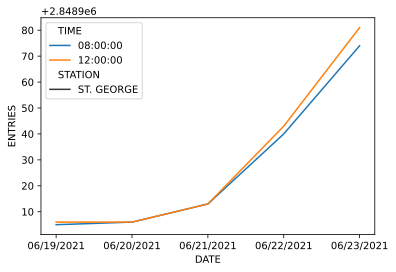

In [18]:
import seaborn as sns
sns.lineplot(
    data=M_P, x="DATE", y="ENTRIES", hue="TIME", style="STATION",
)

In [19]:
PEAKMAX=df_sub[(df_sub.TIME == '08:00:00') | (df_sub.TIME == '12:00:00')].max()
PEAKMAX

C/A                  S101A
STATION    WORLD TRADE CTR
DATE            06/25/2021
TIME              12:00:00
ENTRIES         2116123122
EXITS           2062047725
dtype: object

In [20]:
PEAK2=df_sub[(df_sub.TIME == '16:00:00') | (df_sub.TIME == '20:00:00')]
PEAK2

,C/A,STATION,DATE,TIME,ENTRIES,EXITS
4,A002,59 ST,06/19/2021,16:00:00,7589300,2594278
5,A002,59 ST,06/19/2021,20:00:00,7589434,2594298
10,A002,59 ST,06/20/2021,20:00:00,7589623,2594362
15,A002,59 ST,06/21/2021,16:00:00,7589896,2594588
16,A002,59 ST,06/21/2021,20:00:00,7590174,2594622
...,...,...,...,...,...,...
208346,S101A,ST. GEORGE,03/31/2021,20:00:00,777,0
208351,S101A,ST. GEORGE,04/01/2021,16:00:00,777,0
208352,S101A,ST. GEORGE,04/01/2021,20:00:00,777,0
208357,S101A,ST. GEORGE,04/02/2021,16:00:00,777,0


In [21]:
P=PEAK2.loc[PEAK2['C/A'] == 'S101A'].head(10)

In [22]:
P

,C/A,STATION,DATE,TIME,ENTRIES,EXITS
208197,S101A,ST. GEORGE,06/19/2021,16:00:00,2848906,23470
208198,S101A,ST. GEORGE,06/19/2021,20:00:00,2848906,23470
208203,S101A,ST. GEORGE,06/20/2021,16:00:00,2848906,23470
208204,S101A,ST. GEORGE,06/20/2021,20:00:00,2848906,23470
208209,S101A,ST. GEORGE,06/21/2021,16:00:00,2848919,23470
208210,S101A,ST. GEORGE,06/21/2021,20:00:00,2848936,23470
208215,S101A,ST. GEORGE,06/22/2021,16:00:00,2848953,23470
208216,S101A,ST. GEORGE,06/22/2021,20:00:00,2848965,23470
208221,S101A,ST. GEORGE,06/23/2021,16:00:00,2848994,23470
208222,S101A,ST. GEORGE,06/23/2021,20:00:00,2849017,23470


<AxesSubplot:xlabel='DATE', ylabel='ENTRIES'>

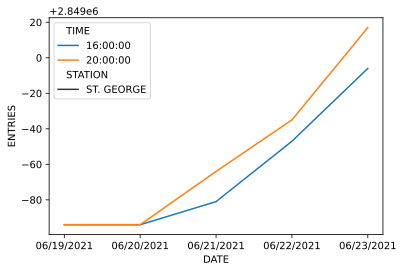

In [23]:
import seaborn as sns
sns.lineplot(
    data=P, x="DATE", y="ENTRIES", hue="TIME", style="STATION",
)

In [24]:
PEAKMAX=df_sub[(df_sub.TIME == '16:00:00') | (df_sub.TIME == '20:00:00')].max()
PEAKMAX

C/A                  S101A
STATION    WORLD TRADE CTR
DATE            06/25/2021
TIME              20:00:00
ENTRIES         2116123272
EXITS           2062047542
dtype: object

# TOP 3 STATION

In [25]:
Top_3_station = df_sub.groupby('STATION').sum()\
    .sort_values(['ENTRIES'] ,ascending=(False))\
    .reset_index().head(3)

In [26]:
Top_3_station 

,STATION,ENTRIES,EXITS
0,42 ST-PORT AUTH,4123197502096,3411389102835
1,125 ST,3568812649881,2809400867142
2,DEKALB AV,3562858624445,2384715208677


# STATION TOTAL

In [27]:
station_totals = df_sub.groupby(['STATION', 'TIME']).agg({
     'ENTRIES': 'sum',
     'EXITS': 'sum'
     
 })

In [28]:
station_totals

ENTRIES        EXITS
STATION   TIME                              
1 AV      00:00:00  42156932307  42521892648
          04:00:00  42085317036  42443771039
          07:35:00    457019600    446088480
          07:40:56    457043729    446152832
          08:00:00  42156263890  42522044533
...                         ...          ...
ZEREGA AV 05:00:00    255711208    171218682
          09:00:00    255744227    171235252
          13:00:00    255760635    171248370
          17:00:00    255780539    171274983
          21:00:00    255791285    171306851

[84148 rows x 2 columns]

In [29]:
stations_result_Entry= pd.pivot_table(Top_3_station, values='ENTRIES',
                    columns=['STATION'], aggfunc=np.sum)

In [30]:
stations_result_Entry.head()

STATION,125 ST,42 ST-PORT AUTH,DEKALB AV
ENTRIES,3568812649881,4123197502096,3562858624445


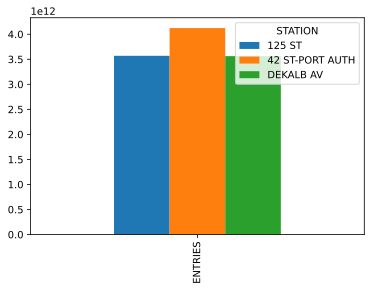

In [31]:
stations_result_Entry.plot.bar(stacked=False);

In [32]:
stations_result_EXITS= pd.pivot_table(Top_3_station, values='EXITS', 
                    columns=['STATION'], aggfunc=np.sum)

In [33]:
stations_result_EXITS.head()

STATION,125 ST,42 ST-PORT AUTH,DEKALB AV
EXITS,2809400867142,3411389102835,2384715208677


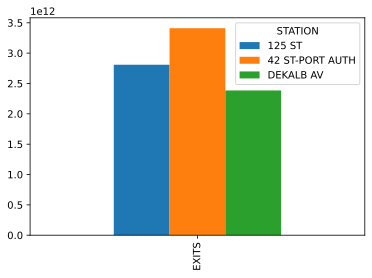

In [34]:
stations_result_EXITS.plot.bar(stacked=False);